# Homework #8

**See Canvas for the HW #8 assignment and due date**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## A. Theoretical Problems

## NOPE!


## B. Computational Problems

## B.1 Do remote students perform worse?

In spring 2019, STAT 5010 had two sections: an in-person section and an online/remote section. The Department of Applied Math is interested to know whether the in-person students performed better than the remote students. For this question, let $\alpha = 0.05$. 

Each row of the dataset is a student from STAT 5010 in 2019. The variables in the dataset are:

- `modality`: `1` denotes in-person, `2` denotes remote.
- `score`: The final score in the class.

In [49]:
# run this cell to load the dataset
library(tidyverse)
library(ggplot2)

df = read.csv("InPersonRemote.csv")
df$modality = as.factor(df$modality)
summary(df)
dim(df)

     score       modality
 Min.   :74.64   1:13    
 1st Qu.:79.15   2:19    
 Median :80.69           
 Mean   :80.99           
 3rd Qu.:82.04           
 Max.   :87.84           

[1] 32  2

**B.1 (a) [10 points] Explore the data to decide whether the normality and equal variance assumptions might be violated (see the "Tests for Differences in Means" section of the notes). If histograms don't help you determine whether the data come from a normally distributed population, you may want to investigate the `R` function `shapiro.test()`.**

If you do not have evidence that the data are non-normal, you can carry on as if the data are normal. If you're not sure whether the variances are equal, assume they aren't.

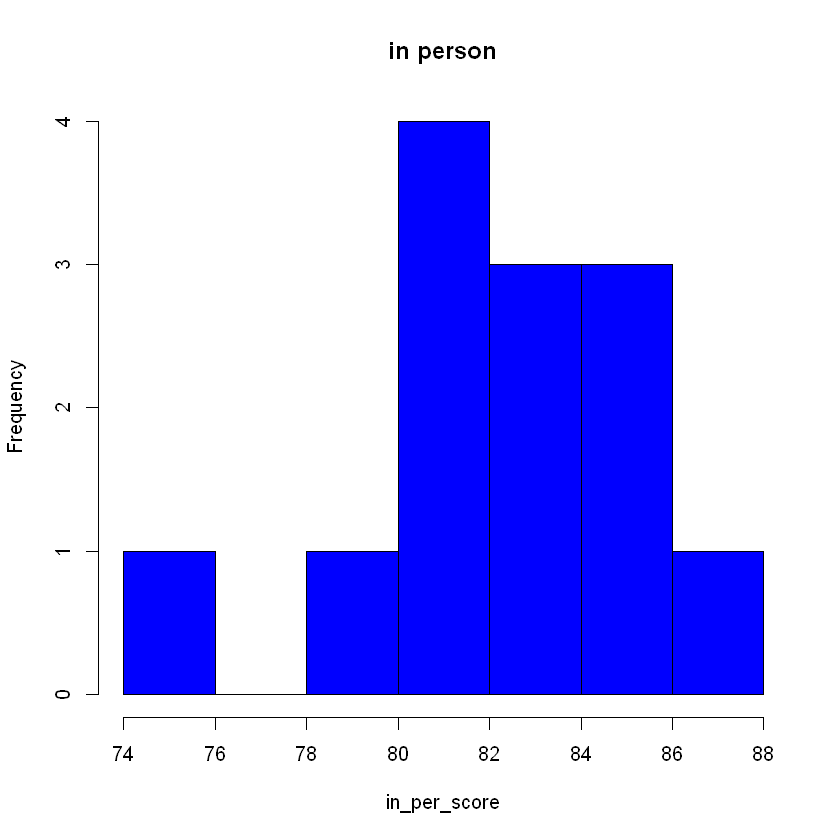


	Shapiro-Wilk normality test

data:  in_per_score
W = 0.954, p-value = 0.6599



	Shapiro-Wilk normality test

data:  remote_scores
W = 0.91808, p-value = 0.1043


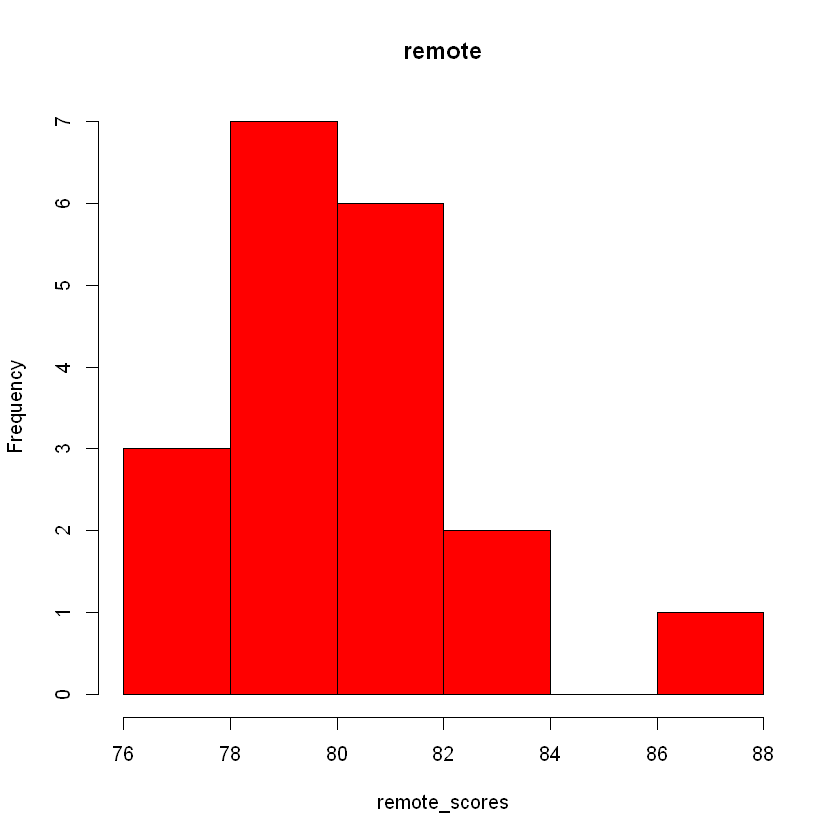

In [50]:
alpha = 0.05
in_per_score = df$score[df$modality == '1']
remote_scores = df$score[df$modality == '2']

hist(in_per_score, main = "in person", col='blue')
hist(remote_scores, main = "remote", col='red')

s_test_in_p = shapiro.test(in_per_score)
s_test_in_p
s_test_rem = shapiro.test(remote_scores)
s_test_rem

Here, in both the groups after performing the 'shapiro test', the p values are > 0.05 so there is no evidence for non normality and the data is normally distributed.
The variance is assumed as unequal and proceeding with this problem because it is difficult to infer about the variance at this point.

Let $\mu_r$ represent the population mean of scores in the remote group. Let $\mu_p$ represent the population mean of scores in the in-person group. 

**B.1 (b) [10 points] Test whether there is statistical evidence that the in-person group performed better than the remote group at the $\alpha = 0.05$ level. Use the appropriate test, based on the results from B.1(a). Code the test yourself (without using a built-in `R` function). Be sure to write out your null and alternative hypotheses and clearly state your decision.**

We'll assume that no other variables would be relevant to any difference in scores (but that's probably not true, and we learn how to deal with this kind of situation in STAT 5010!).

In [ ]:
H0 = "mu_p = mu_r (There is no difference in mean scores of inperson and remote students)"
H1 = "mu_p > mu_r (There is a difference in means scores between inperson and remote students)" 
alpha = 0.05
# One tailed test

mu_r = mean(remote_scores)
mu_p = mean(in_per_score)

s_sq_p = var(in_per_score)
s_sq_r = var(remote_scores)

n_p = length(in_per_score)
n_r = length(remote_scores)

t_stat <- (mu_p - mu_r) / sqrt((s_sq_p / n_p) + (s_sq_r / n_r))
t_stat
dof = ((s_sq_p / n_p) + (s_sq_r / n_r))^2 / (((s_sq_p / n_p)^2 / (n_p - 1)) + ((s_sq_r / n_r)^2 / (n_r - 1)))
dof
p = 1 - pt(t_stat, dof)
p

if(p<alpha){
    print(H1)
}else{
    print(H0)
}


[1] 1.849684

[1] 19.37781

[1] 0.03983559

[1] "mu_p > mu_r (There is a difference in means scores between inperson and remote students)"


- p < alpha
- So reject H0 and accept H1. mu_p > mu_r (In person means scores are greater than the mean scores of remote students so in person students performed better)

**B.1 (c) [10 points] Now find an `R` function that conducts the test that you used in B.1(b). Interpret the confidence interval given by that function.**

In [52]:
t_test = t.test(score ~ modality, data = df, var.equal = FALSE, alternative = "greater")
t_test


	Welch Two Sample t-test

data:  score by modality
t = 1.8497, df = 19.378, p-value = 0.03984
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.130191      Inf
sample estimates:
mean in group 1 mean in group 2 
       82.16154        80.19211 


- p value < alpha so we reject the null hypothesis.
- In person students performed better than the remote students.
- CI [0.1302,inf) which means, the mean score of in person students is 0.13 points higher than the mean score of remote students and the upper limit is 'inf' since it's a one tailed test.
- The difference in average scores is at least 0.13 (mu_p = 82.16, mu_r = 80.19)

## B.2 Parametric tests without normality
Let $X ∼ \text{Pois}(\lambda)$. We want to test the null hypothesis that $\lambda \leq 15$, and the alternative hypothesis is that $\lambda > 15$. Our sample size for this test is equal to $1$.  We will reject the null hypothesis if $X$ is greater than a certain value $c$.

**B.2 (a) [18 points] What value should we choose for $c$ such that the probability of a type I error is at most $0.10$? In the first cell, write out the relevant formulas. In the second (code cell), construct a table of values for $c$ along with the corresponding type I errors. In the third, state $c$.**

$$
P(\text{Type I Error}) = P(X > c) = 1 - P(X \leq c) = 1 - Poisson(c, \lambda = 15)
$$


In [ ]:
lambda = 15
res = data.frame(c= 0:30, Type_I_Error = NA)

for(i in 1:nrow(res)) {
    c = res$c[i]
    res$Type_I_Error[i] = 1 - ppois(c,lambda)
}
res

c,Type_I_Error
0,0.9999996941
1,0.9999951056
2,0.9999606916
3,0.9997886215
4,0.9991433588
5,0.9972075707
6,0.9923681004
7,0.9819978069
8,0.9625535065
9,0.9301463393


We will select c = 20 because of it's maximum value of Type I Error ie. 0.08 which is less than 0.10.


**B.2 (b) [10 points] If $\lambda$ is actually equal to $20$, what is the probability of making a Type II error using the cut-off point from B.2 (a)? In the first cell, write the appropriate formula. In the second, calculate it using `R`.**

$$
P(\text{Type II Error}) = P(X \leq c \,|\, \lambda = 20) = Poisson(c, \lambda = 20)
$$


In [54]:
lambda = 20
c = 20

Type_II_Error = ppois(c,lambda)
Type_II_Error

[1] 0.5590926

## B.3 Coin Flipping and Power

Let $X$ be the number of heads in $n = 60$ tosses of a coin. Denote the probability of heads as $p$. In this example, we will explore properties of a test of whether the coin is biased toward heads. 

**B.3(a) [10 points] Explicitly write out the null and alternative hypotheses. Let the parameter space be all $p \in (0,1)$.**

\begin{align*}
    &H_0: \, p \leq 0.5 \text{ (There is no evidence that the coin is biased towards heads) } \\
    &H_1: \, p > 0.5. \text{ (The coin is biased towards heads) }
\end{align*}

**B.3(b) [8 points] Define the rejection region to be  $X \ge 37$.  Calculate the rate of type I error. (For this part, and all remaining parts, calculate probabilities exactly, i.e., without using the normal approximation).**

In [55]:
n = 60
p = 0.5
rej_reg = 37

type_I_error = 1 - pbinom(rej_reg - 1,n,p)
type_I_error

[1] 0.04623049

**B.3(c) [14 points] Construct a grid of values for $p$ under the alternative hypothesis. For each value of $p$ in this grid, calculate the power of this test (remember that statistical power is the probability of rejecting the null hypothesis while an alternative hypothesis is true). Make a plot of the power ($y$-axis) vs $p$ ($x$-axis). Interpret/comment on this plot. In particular, as $p$ gets further from the $p$ specified under the null hypothesis, what happens to the power?**


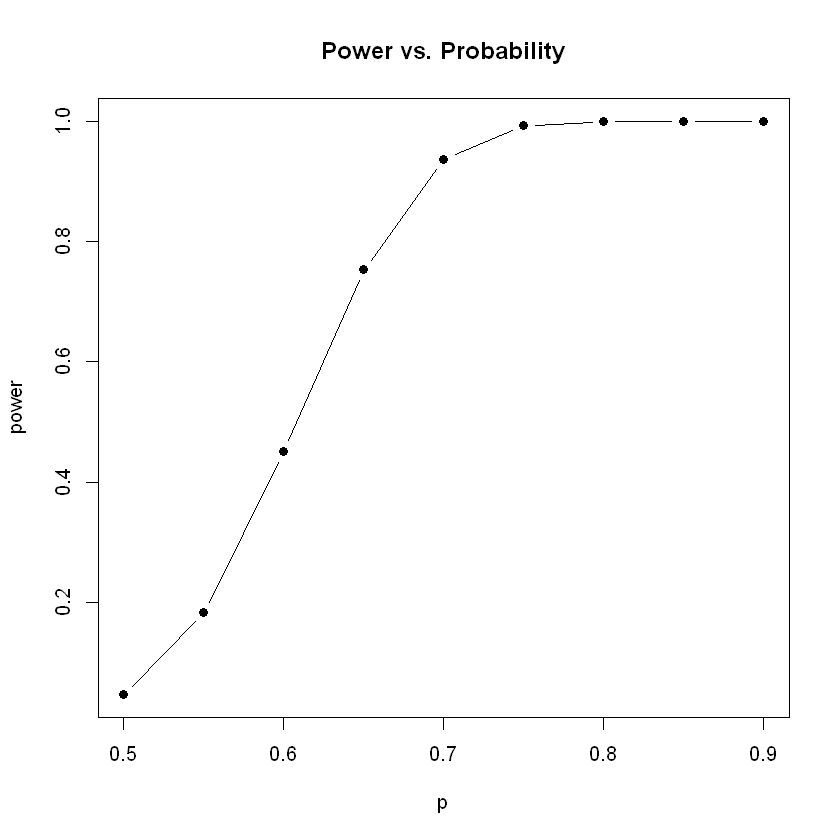

In [56]:
n = 60
p_values = seq(0.5, 0.9, by = 0.05)

power = sapply(p_values, function(p) 1 - pbinom(rej_reg - 1, n, p))

df = data.frame(p_values,power)

plot(df$p_values, df$power, type = "b", pch = 16, xlab = "p", 
     ylab = "power", main = "Power vs. Probability")


From this plot it is clearly visible that the Power of the Test increases when p > 0.5 ie (when the alternative hypothesis is true) and not at the Null hypothesis probability.
So the probablity of Rejecting the Null Hypothesis the power of a test increases. So in H1 the coin is biased towards the heads.


**B.3(d) [10 points] Suppose that you flip the coin and get $27$ heads out of $60$. Use this information to test your hypotheses from part B.3(a). State your conclusion.**


In [59]:
H0 = "There is no evidence that the coin is biased towards heads"
H1 = "The coin is biased towards heads"

n = 60
prob_H0 = 0.5
x_heads = 27

p_value = 1 - pbinom(x_heads-1,n,p)
p_value

alpha = 0.05

if (p_value < alpha) {
    cat(H1)
} else {
    cat(H0)
} 

[1] 0.816853

There is no evidence that the coin is biased towards heads

Here, p_value > significance level (alpha).  so, we fail to reject H0. 
- There is no evidence that the coin is biased. 